In [57]:
import pymc3 as pm
import numpy as np
from theano import tensor as tt
import pylab as plt
import pandas as pd

In [73]:
delta = 0.1
with pm.Model() as model:
    x = pm.Uniform('x', 0.1,1-(2*delta))
    y = pm.Uniform('y', 0.1,1-delta)
    z = pm.Uniform('z', 0.1,1)
    
    fin_y = pm.Deterministic('fin_y', tt.max([y, x+0.1]))
    fin_z = pm.Deterministic('fin_z', tt.max([z, fin_y+0.1]))

In [82]:
with model:
    trace = pm.sample()
#     advi = pm.ADVI()
#     approx = advi.fit(20000)
#     trace = approx.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [z, y, x]
Sampling 4 chains, 0 divergences: 100%|██████████| 4000/4000 [00:00<00:00, 4174.15draws/s]


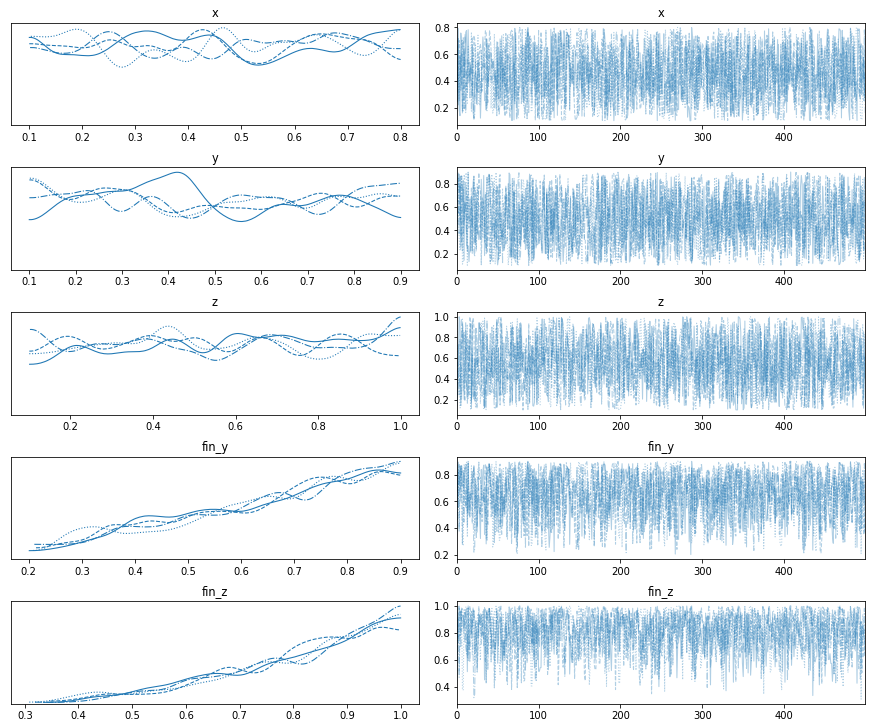

In [83]:
pm.traceplot(trace);

In [84]:
x_t = trace['x']
y_t = trace['fin_y']
z_t = trace['fin_z']

In [85]:
x_lin = np.linspace(0,1)

Text(0, 0.5, 'y')

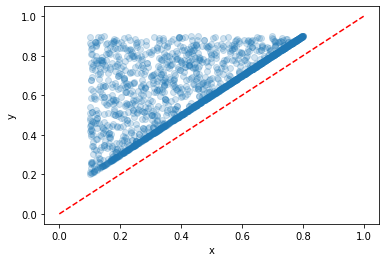

In [90]:
plt.scatter(x_t,y_t,label = 'x,y', alpha = 0.2)
plt.plot(x_lin,x_lin,linestyle = 'dashed', color = 'red')
plt.xlabel('x')
plt.ylabel('y')
# plt.xlim(0,1)
# plt.ylim(0,1)

Text(0, 0.5, 'z')

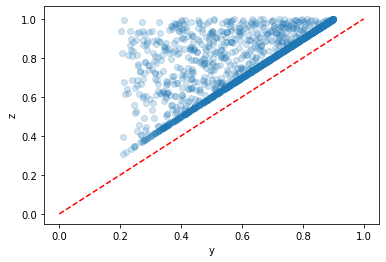

In [91]:
plt.scatter(y_t,z_t,label = 'y,z', alpha = 0.2)
plt.plot(x_lin,x_lin,linestyle = 'dashed', color = 'red')
plt.xlabel('y')
plt.ylabel('z')
# plt.xlim(0,1)
# plt.ylim(0,1)

In [92]:
ch_frame = pd.DataFrame(dict(
                    x = x_t,
                    y=y_t,
                    z=z_t))

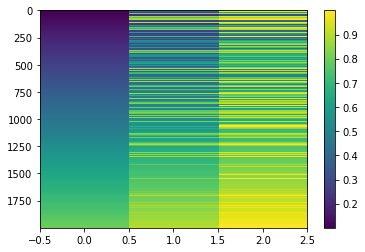

In [93]:
plt.imshow(ch_frame.sort_values(['x','y','z']).values,aspect='auto')
plt.colorbar()